# Intro

In [1]:
import numpy as np
import talib as ta

In [7]:
import matplotlib.pyplot as plt

In [8]:
import pandas as pd

In [2]:
close = np.random.random(100)
close

array([0.92492465, 0.26876168, 0.70821284, 0.14910293, 0.36751121,
       0.02397074, 0.88083804, 0.05791952, 0.8127347 , 0.09965954,
       0.90754888, 0.21694213, 0.51347729, 0.1729174 , 0.62118942,
       0.91158633, 0.57362354, 0.60651937, 0.7379805 , 0.37559418,
       0.43805083, 0.17583729, 0.67433194, 0.6912398 , 0.39378423,
       0.45944258, 0.13492182, 0.69443259, 0.19919132, 0.26439859,
       0.00498881, 0.39239559, 0.64097851, 0.07599679, 0.06111206,
       0.63840316, 0.61708203, 0.71399842, 0.5394003 , 0.58368048,
       0.57855046, 0.79183612, 0.40616535, 0.53680143, 0.60335068,
       0.77269142, 0.88166089, 0.68163112, 0.80860615, 0.04807605,
       0.95008637, 0.60210658, 0.02245374, 0.05380727, 0.09360838,
       0.77655409, 0.15289321, 0.71913484, 0.43157611, 0.71779172,
       0.95104259, 0.99683753, 0.45024339, 0.72882715, 0.97492195,
       0.60201579, 0.53811597, 0.98576455, 0.98728431, 0.11164858,
       0.8335457 , 0.59408119, 0.37787685, 0.01969043, 0.90160

In [6]:
fastMa = ta.SMA(close, timeperiod=20)
fastMa

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.49655075,
       0.47220705, 0.46756084, 0.46586679, 0.49297363, 0.49428728,
       0.51606088, 0.47876507, 0.51059072, 0.47991355, 0.4881505 ,
       0.4430225 , 0.45179517, 0.45817023, 0.4533242 , 0.42532033,
       0.41166117, 0.4138341 , 0.41920805, 0.40927904, 0.41968336,
       0.42670834, 0.45750828, 0.44409995, 0.43637803, 0.44685635,
       0.4625188 , 0.49985575, 0.49921568, 0.52968642, 0.51887029,
       0.56612517, 0.57661072, 0.54568448, 0.544575  , 0.54619982,
       0.55310737, 0.52989792, 0.53015475, 0.52476354, 0.5314691 ,
       0.5500937 , 0.56034378, 0.56254768, 0.57214896, 0.59072753,
       0.58219374, 0.5650165 , 0.58022317, 0.58915708, 0.59233571,
       0.58650867, 0.5861074 , 0.60387856, 0.60217272, 0.64257

In [9]:
df = pd.DataFrame({'close': close, 'fastMa': fastMa})

In [10]:
df.head(10)

,close,fastMa
0,0.924925,NaN
1,0.268762,NaN
2,0.708213,NaN
3,0.149103,NaN
4,0.367511,NaN
5,0.023971,NaN
6,0.880838,NaN
7,0.057920,NaN
8,0.812735,NaN
9,0.099660,NaN


### insert slope column to the df

In [11]:
from scipy import stats

In [19]:
df['slope'] = df['fastMa'].rolling(10).apply(lambda x: stats.linregress(np.arange(len(x)), x)[0])

In [14]:
df.tail(10)

,close,fastMa,slope
90,0.667212,0.555552,0.012436
91,0.871121,0.569404,0.002768
92,0.416410,0.571330,0.007889
93,0.842035,0.612448,0.021522
94,0.997420,0.617238,0.022954
95,0.215981,0.583953,-0.014248
96,0.785199,0.615954,-0.000642
97,0.151220,0.589533,0.002790
98,0.850577,0.598456,-0.008749
99,0.049809,0.596565,0.003516


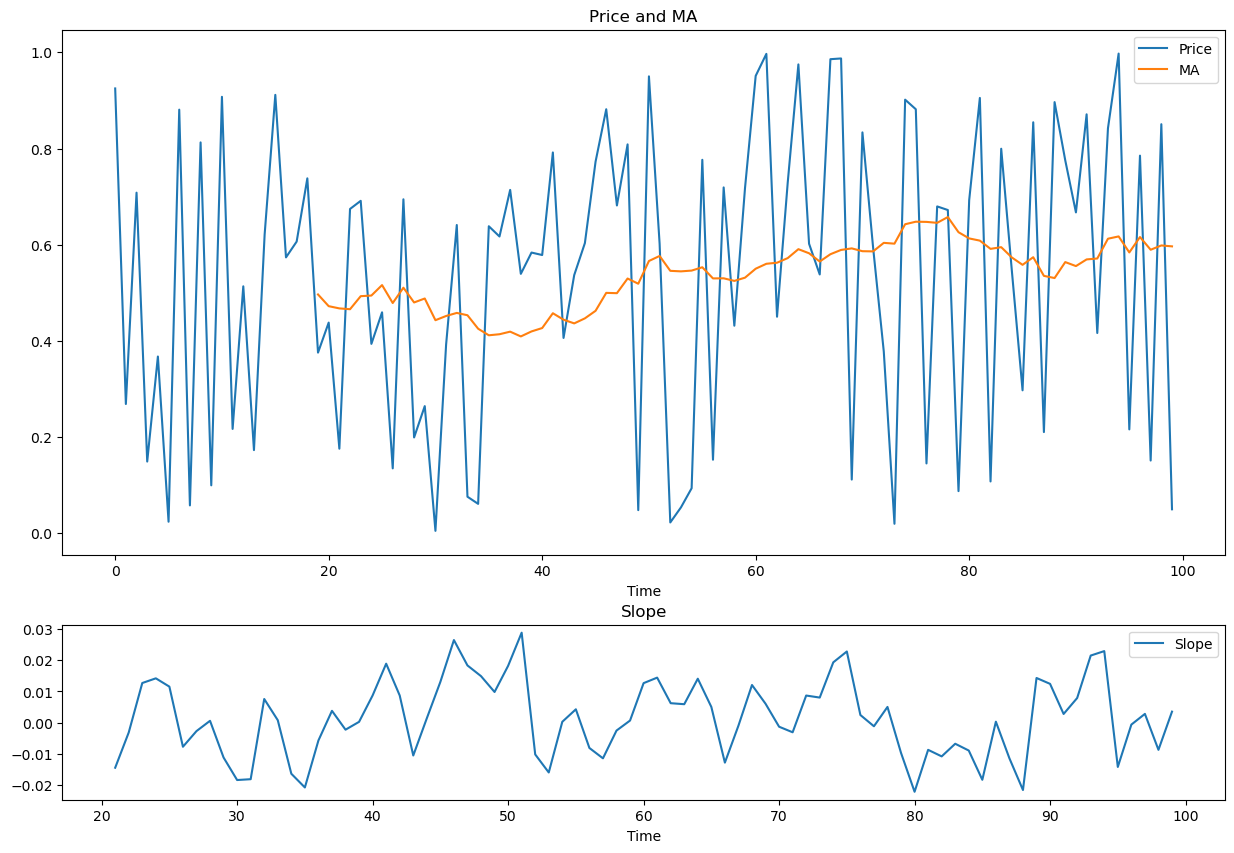

In [16]:
# Create a figure and axis object
fig, axs = plt.subplots(2, 1, figsize=(
    15, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot the 'price' and 'ma' columns on the first axis object
axs[0].plot(df['close'], label='Price')
axs[0].plot(df['fastMa'], label='MA')
axs[0].set_title('Price and MA')
axs[0].legend(loc='best')
axs[0].set_xlabel('Time')

# Plot the 'slope' column on the second axis object
axs[1].plot(df['slope'], label='Slope')
axs[1].set_title('Slope')
axs[1].legend(loc='best')
axs[1].set_xlabel('Time')

# Display the merged graph
plt.show()


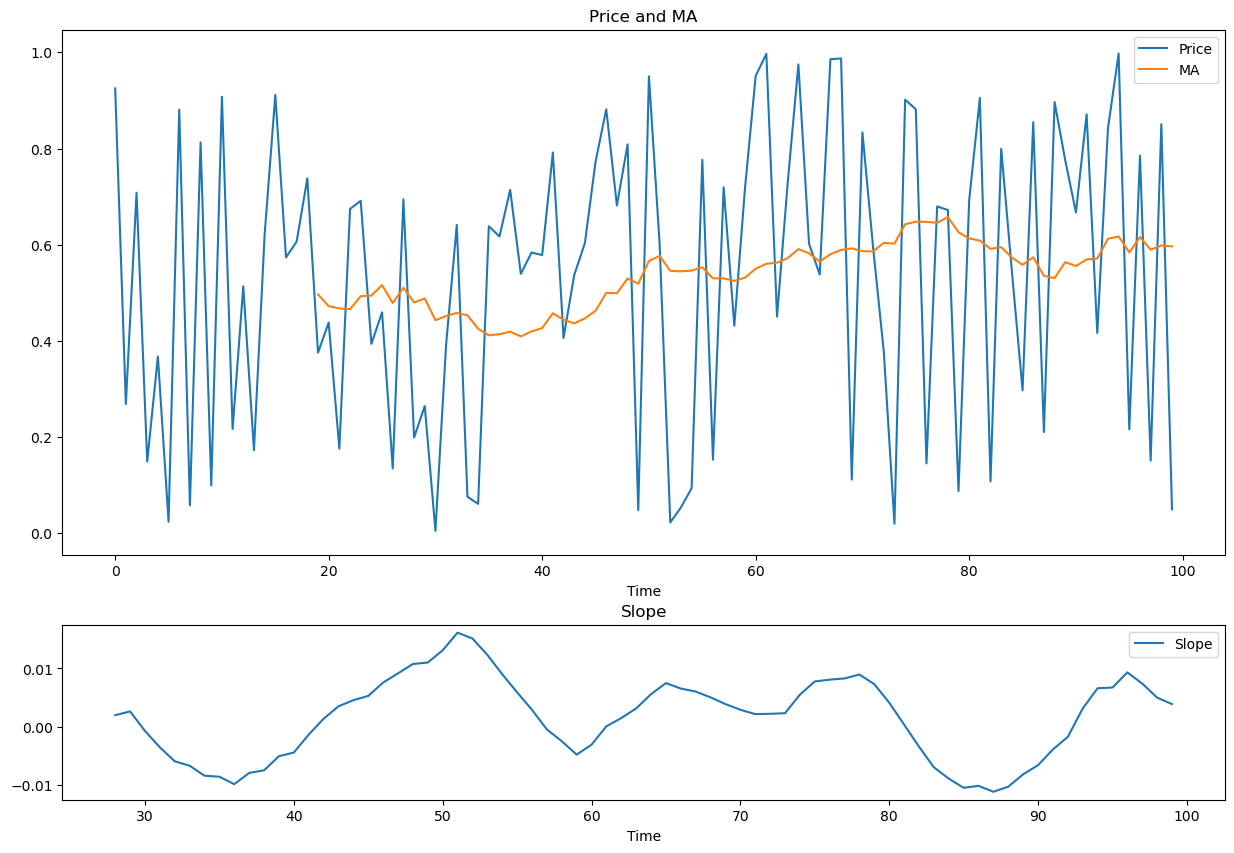

In [20]:
# Create a figure and axis object
fig, axs = plt.subplots(2, 1, figsize=(
    15, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot the 'price' and 'ma' columns on the first axis object
axs[0].plot(df['close'], label='Price')
axs[0].plot(df['fastMa'], label='MA')
axs[0].set_title('Price and MA')
axs[0].legend(loc='best')
axs[0].set_xlabel('Time')

# Plot the 'slope' column on the second axis object
axs[1].plot(df['slope'], label='Slope')
axs[1].set_title('Slope')
axs[1].legend(loc='best')
axs[1].set_xlabel('Time')

# Display the merged graph
plt.show()


### Abstract API

In [21]:
import numpy as np
# note that all ndarrays must be the same length!
inputs = {
    'open': np.random.random(100),
    'high': np.random.random(100),
    'low': np.random.random(100),
    'close': np.random.random(100),
    'volume': np.random.random(100)
}


In [22]:
from talib import abstract
sma = abstract.SMA

In [23]:
output = sma(inputs, timePeriod= 20, price='close')

In [24]:
ta.get_function_groups()

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [25]:
y = np.array([ 2.,  4.,  6.,  8., 10., 12., 14., 16.])
y

array([ 2.,  4.,  6.,  8., 10., 12., 14., 16.])

In [29]:
ydf = pd.DataFrame(y, columns=['y'])

In [30]:
ydf['slope'] = ydf.rolling(3).apply(lambda x: stats.linregress(np.arange(len(x)), x)[0])

In [31]:
ydf

,y,slope
0,2.0,NaN
1,4.0,NaN
2,6.0,2.0
3,8.0,2.0
4,10.0,2.0
5,12.0,2.0
6,14.0,2.0
7,16.0,2.0


In [27]:
ta.LINEARREG_SLOPE(y, timeperiod=3)

array([nan, nan,  2.,  2.,  2.,  2.,  2.,  2.])

In [32]:
ydf['slope_by_ta'] = ta.LINEARREG_SLOPE(y, timeperiod=3)

In [33]:
ydf

,y,slope,slope_by_ta
0,2.0,NaN,NaN
1,4.0,NaN,NaN
2,6.0,2.0,2.0
3,8.0,2.0,2.0
4,10.0,2.0,2.0
5,12.0,2.0,2.0
6,14.0,2.0,2.0
7,16.0,2.0,2.0


## demo practice

### prepare data

In [54]:
import yfinance as yf

In [66]:
# create a currency object @DXY
dxy = yf.Ticker("SLV")
dxy.info

{'longBusinessSummary': "The Trust seeks to reflect such performance before payment of the Trust's expenses and liabilities. It is not actively managed. The Trust does not engage in any activities designed to obtain a profit from, or to ameliorate losses caused by, changes in the price of silver.",
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 22.88,
 'open': 22.9,
 'dayLow': 22.85,
 'dayHigh': 23.1,
 'regularMarketPreviousClose': 22.88,
 'regularMarketOpen': 22.9,
 'regularMarketDayLow': 22.85,
 'regularMarketDayHigh': 23.1,
 'volume': 14454490,
 'regularMarketVolume': 14454490,
 'averageVolume': 18409461,
 'averageVolume10days': 17103610,
 'averageDailyVolume10Day': 17103610,
 'bid': 0.0,
 'ask': 0.0,
 'bidSize': 27000,
 'askSize': 47300,
 'yield': 0.0,
 'totalAssets': 11112055808,
 'fiftyTwoWeekLow': 16.19,
 'fiftyTwoWeekHigh': 24.16,
 'fiftyDayAverage': 20.5594,
 'twoHundredDayAverage': 19.42625,
 'trailingAnnualDividendRate': 0.0,
 'trailingAnnualDividendYield': 0.0,
 'navP

In [58]:
import pprint

In [87]:
# get historical market data
hist = dxy.history(period="1y", interval="1d")
pprint.pprint(hist)
print(type(hist))

                                Open       High        Low      Close  \
Date                                                                    
2022-04-12 00:00:00-04:00  23.400000  23.660000  23.230000  23.469999   
2022-04-13 00:00:00-04:00  23.670000  23.860001  23.590000  23.750000   
2022-04-14 00:00:00-04:00  23.600000  23.680000  23.370001  23.639999   
2022-04-18 00:00:00-04:00  24.040001  24.160000  23.820000  23.870001   
2022-04-19 00:00:00-04:00  23.580000  23.629999  23.139999  23.240000   
...                              ...        ...        ...        ...   
2023-04-04 00:00:00-04:00  22.129999  23.000000  22.100000  22.969999   
2023-04-05 00:00:00-04:00  22.820000  22.980000  22.639999  22.940001   
2023-04-06 00:00:00-04:00  22.790001  22.980000  22.580000  22.889999   
2023-04-10 00:00:00-04:00  22.820000  22.889999  22.719999  22.879999   
2023-04-11 00:00:00-04:00  22.900000  23.100000  22.850000  23.040001   

                             Volume  Dividends  St

In [68]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-04-12 00:00:00-04:00 to 2023-04-11 00:00:00-04:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1258 non-null   float64
 1   High           1258 non-null   float64
 2   Low            1258 non-null   float64
 3   Close          1258 non-null   float64
 4   Volume         1258 non-null   int64  
 5   Dividends      1258 non-null   float64
 6   Stock Splits   1258 non-null   float64
 7   Capital Gains  1258 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 88.5 KB


In [77]:
hist.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2018-04-12 00:00:00-04:00,15.58,15.59,15.50,15.52,7487100
2018-04-13 00:00:00-04:00,15.64,15.73,15.64,15.68,6159000
2018-04-16 00:00:00-04:00,15.77,15.81,15.69,15.72,5231200


In [88]:
hist.drop(columns=['Dividends', 'Stock Splits', 'Capital Gains'],inplace=True)


In [89]:
hist['slowMa'] = SMA(hist['Close'], timeperiod=100)
hist['fastMa'] = SMA(hist['Close'], timeperiod=20)
hist['slope@slowMa'] = hist['slowMa'].rolling(5).apply(lambda x: stats.linregress(np.arange(len(x)), x)[0])


In [90]:
hist['slope@slowMa_by_ta'] = ta.LINEARREG_SLOPE(hist['slowMa'], timeperiod=5)

In [91]:
hist.tail(10)

,Open,High,Low,Close,Volume,slowMa,fastMa,slope@slowMa,slope@slowMa_by_ta
Date,,,,,,,,,
2023-03-28 00:00:00-04:00,21.139999,21.490000,21.120001,21.430000,11221300,20.5897,19.9735,0.03460,0.03460
2023-03-29 00:00:00-04:00,21.320000,21.530001,21.299999,21.440001,11804300,20.6268,20.0810,0.03532,0.03532
2023-03-30 00:00:00-04:00,21.680000,21.959999,21.559999,21.940001,14724400,20.6668,20.2160,0.03647,0.03647
2023-03-31 00:00:00-04:00,22.030001,22.200001,21.990000,22.120001,18203200,20.6954,20.3445,0.03561,0.03561
2023-04-03 00:00:00-04:00,21.959999,22.240000,21.920000,22.059999,18134900,20.7245,20.4815,0.03382,0.03382
2023-04-04 00:00:00-04:00,22.129999,23.000000,22.100000,22.969999,35724700,20.7572,20.7075,0.03185,0.03185
2023-04-05 00:00:00-04:00,22.820000,22.980000,22.639999,22.940001,20676800,20.7930,20.9345,0.03142,0.03142
2023-04-06 00:00:00-04:00,22.790001,22.980000,22.580000,22.889999,13297400,20.8222,21.1570,0.03221,0.03221
2023-04-10 00:00:00-04:00,22.820000,22.889999,22.719999,22.879999,12751600,20.8515,21.3580,0.03190,0.03190


### bake the graph

In [92]:
import mplfinance as mpf

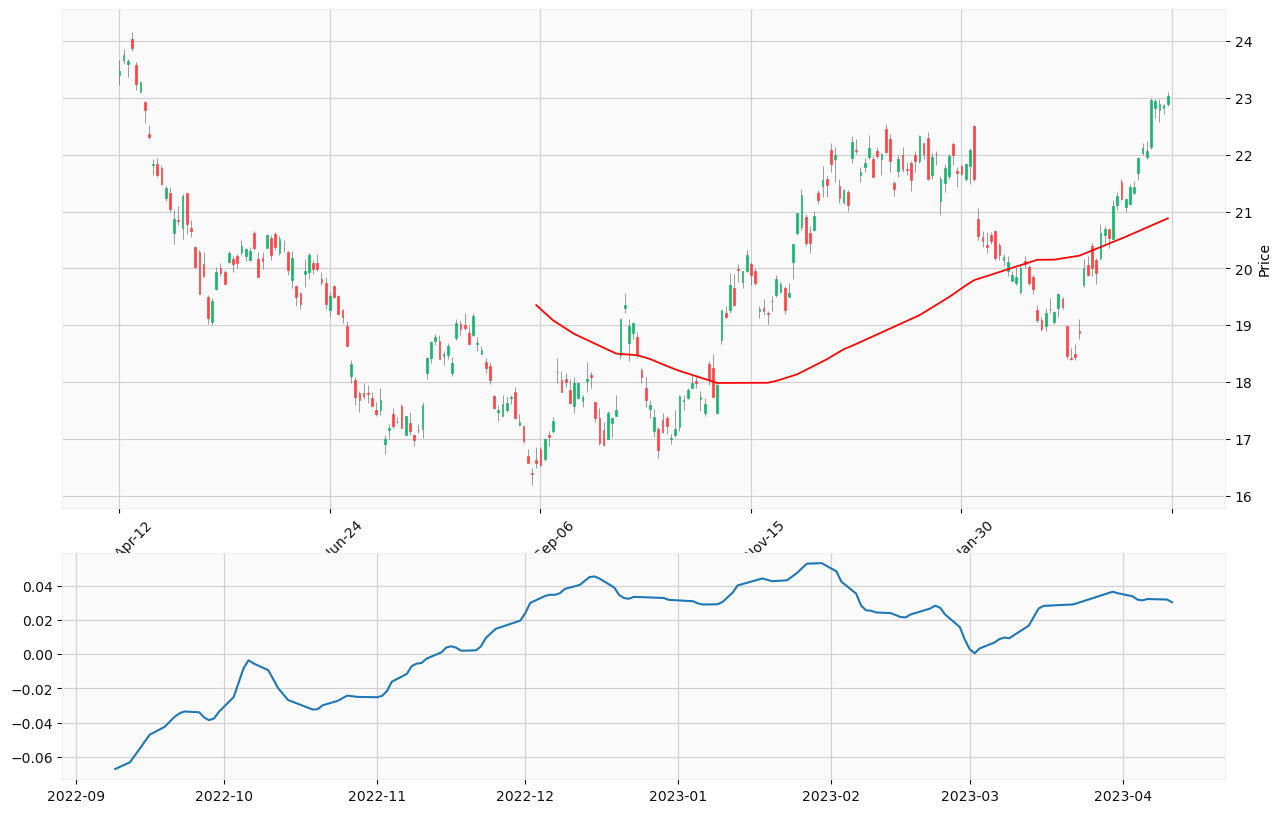

In [111]:
# Create a figure and axis object
fig = mpf.figure(style='yahoo', figsize=(15, 10))

ax1= fig.add_subplot(3,1,(1,2))
ax2 = fig.add_subplot(3,1,3)

mpf.plot(hist, type='candle', ax=ax1, addplot= mpf.make_addplot(hist['slowMa'], color='r', ax=ax1 ))
# mpf.make_addplot(hist['slowMa'], ax=ax1, color='r')
ax2.plot(hist['slope@slowMa'], label='slope@slowMa')


In [35]:
from talib import abstract
SMA = abstract.Function('SMA')
ATR = abstract.Function('ATR')

## demo practice 2